In [195]:
import pandas as pd
import numpy as np
import os
import datetime
print(datetime.datetime.now().strftime('%Y-%m-%d'))
import matplotlib.pyplot as plt

2024-06-18


# 1. Combine all lipid GWAS result into one file for annotation
Only combine SNPs with GWAS pval<1e-5

## 1.1 Lipid species

In [153]:
path = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_snps_pval_1e-5'
df_lst = []

for i, fn in enumerate(os.listdir(path)):
    lipid = fn.split('_suggestive_sig_SNPs')[0]
    df = pd.read_csv(f'{path}/{fn}', sep='\t')
    df['lipid'] = lipid
    df_lst.append(df)
    print(f'\rProcessed {i+1}/{len(os.listdir(path))}    ', end='', flush=True)
print('\n# DONE')

df_combined = pd.concat(df_lst)
print('# N combined SNPs:', len(df_combined))

df_combined.sort_values(by=['CHR', 'POS', 'P'], inplace=True)
df_combined.drop_duplicates(subset=['CHR', 'POS'], keep='first', inplace=True)
print('# N combined SNPs (no dup, keep the smallest pval):', len(df_combined))

df_combined.to_csv('../input/combined_snps_1e-5_lipid_species_gwas_adj_bmi_age2.txt',
                   sep='\t', index=False)

Processed 830/830    
# DONE
# N combined SNPs: 793592
# N combined SNPs (no dup, keep the smallest pval): 230458


In [14]:
path = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_species_GWAS_noadj_BMI_AGE2_snps_pval_1e-5'
df_lst = []

for i, fn in enumerate(os.listdir(path)):
    lipid = fn.split('_suggestive_sig_SNPs')[0]
    df = pd.read_csv(f'{path}/{fn}', sep='\t')
    df['lipid'] = lipid
    df_lst.append(df)
    print(f'\rProcessed {i+1}/{len(os.listdir(path))}    ', end='', flush=True)
print('\n# DONE')

df_combined = pd.concat(df_lst)
print('# N combined SNPs:', len(df_combined))

df_combined.sort_values(by=['CHR', 'POS', 'P'], inplace=True)
df_combined.drop_duplicates(subset=['CHR', 'POS'], keep='first', inplace=True)
print('# N combined SNPs (no dup, keep the smallest pval):', len(df_combined))

Processed 830/830    
# DONE
# N combined SNPs: 771183
# N combined SNPs (no dup, keep the smallest pval): 211398


In [26]:
# Prepare files of significant hits to do annotation on FAVOR annotator
# Expected file contains one snp per line, in the format such as 1-10253-CTA-C
df_sig_snps = df_combined[mask].copy()
df_sig_snps['SNP_id'] = df_sig_snps['SNP'].apply(lambda x: x.split('chr')[-1].replace(':', '-'))
df_sig_snps.head()

for chr_num, df_tmp in df_sig_snps.groupby('CHR'):
    df_tmp['SNP_id'].to_csv(f'../input/combined_snps_for_annotation/chr{chr_num}_1e-8_lipid_species_gwas_noadj_bmi_age2.txt',
                            index=False, header=False)
    print(f'# {chr_num}', end=', ', flush=True)
print('\n# DONE')

# 1, # 2, # 3, # 4, # 5, # 6, # 7, # 8, # 9, # 10, # 11, # 12, # 13, # 14, # 15, # 16, # 18, # 19, # 20, # 22, 
# DONE


In [ ]:
# df_combined.to_csv('../input/combined_snps_1e-5_lipid_species_gwas_noadj_bmi_age2.txt',
#                    sep='\t', index=False)

# mask = df_combined['P']<=1e-8
# df_combined[mask].to_csv('../input/combined_snps_1e-8_lipid_species_gwas_noadj_bmi_age2.txt',
#                          sep='\t', index=False)

## 1.2 Lipid class

In [196]:
path = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_snps_pval_1e-5'
df_lst = []

for i, fn in enumerate(os.listdir(path)):
    lipid = fn.split('_suggestive_sig_SNPs')[0]
    df = pd.read_csv(f'{path}/{fn}', sep='\t')
    df['lipid'] = lipid
    df_lst.append(df)
    print(f'\rProcessed {i+1}/{len(os.listdir(path))}    ', end='', flush=True)
print('\n# DONE')

df_combined = pd.concat(df_lst)
print('# N combined SNPs:', len(df_combined))

df_combined.sort_values(by=['CHR', 'POS', 'P'], inplace=True)
df_combined.drop_duplicates(subset=['CHR', 'POS'], keep='first', inplace=True)
print('# N combined SNPs (no dup, keep the smallest pval):', len(df_combined))

df_combined.to_csv('../input/combined_snps_1e-5_lipid_class_gwas_adj_bmi_age2.txt',
                   sep='\t', index=False)

Processed 49/49    
# DONE
# N combined SNPs: 35503
# N combined SNPs (no dup, keep the smallest pval): 31290


In [197]:
path = '/data100t1/home/wanying/CCHC/lipidomics/output/lip_class_GWAS_noadj_BMI_AGE2_snps_pval_1e-5'
df_lst = []

for i, fn in enumerate(os.listdir(path)):
    lipid = fn.split('_suggestive_sig_SNPs')[0]
    df = pd.read_csv(f'{path}/{fn}', sep='\t')
    df['lipid'] = lipid
    df_lst.append(df)
    print(f'\rProcessed {i+1}/{len(os.listdir(path))}    ', end='', flush=True)
print('\n# DONE')

df_combined = pd.concat(df_lst)
print('# N combined SNPs:', len(df_combined))

df_combined.sort_values(by=['CHR', 'POS', 'P'], inplace=True)
df_combined.drop_duplicates(subset=['CHR', 'POS'], keep='first', inplace=True)
print('# N combined SNPs (no dup, keep the smallest pval):', len(df_combined))

df_combined.to_csv('../input/combined_snps_1e-5_lipid_class_gwas_noadj_bmi_age2.txt',
                   sep='\t', index=False)

Processed 48/48    
# DONE
# N combined SNPs: 25011
# N combined SNPs (no dup, keep the smallest pval): 21391


# 2. Manually map SNPs to gene
Use Ensembl reference file

## 2.1 Make a cleaned version of reference file

In [50]:
# Make a cleaned version of reference file
def get_gene_name(val):
    '''
    Get gene name from attribute column of a gtf file
    Param:
    - val: a single value of a attribute column,
        eg. gene_id "ENSG111"; gene_version "5"; gene_name "xxxx"; gene_source "hava"
    '''
    for v in val.split('; '):
        if  'gene_name' in v:
            gene_name = v.split(' ')[-1].strip('"')
            return gene_name

def get_gene_biotype(val):
    '''
    Get gene name from attribute column of a gtf file
    Param:
    - val: a single value of a attribute column,
        eg. gene_id "ENSG111"; gene_version "5"; gene_name "xxxx"; gene_source "hava"; gene_biotype "xxxx"
    '''
    for v in val.split(';'):
        if  'gene_biotype' in v:
            gene_biotype = v.strip().split(' ')[-1].strip('"')
            return gene_biotype
            
ref_fn = '/data100t1/home/wanying/shared_data_files/Ensembl/Homo_sapiens.GRCh38.103.gtf.gz'
df_gene_ref = pd.read_csv(ref_fn, sep='\t', comment='#', compression='gzip', dtype=str, header=None)
df_gene_ref.columns = ['chr', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']

mask = df_gene_ref['feature'] == 'gene' # Remove duplicate info
df_gene_ref = df_gene_ref[mask].copy()
df_gene_ref['gene'] = df_gene_ref['attribute'].apply(get_gene_name)
df_gene_ref['gene_biotype'] = df_gene_ref['attribute'].apply(get_gene_biotype)
print('# Number of genes remained:', len(df_gene_ref))

# df_gene_ref.to_csv('../supporting_files/ensembl_ref_GRCh38.103.txt', sep='\t', index=False)

# Number of genes remained: 60666


## 2.2 Map SNP to gene

In [56]:
mask_gene_type = df_gene_ref['gene_biotype'] == 'protein_coding'
# df_gene_ref[mask_gene_type].to_csv('../supporting_files/ensembl_ref_GRCh38.103.protein_coding_only.txt', sep='\t', index=False)


In [176]:
# Re-load saved file
# df_gene_ref = pd.read_csv('../supporting_files/ensembl_ref_GRCh38.103.txt', sep='\t')
df_gene_ref = pd.read_csv('../supporting_files/ensembl_ref_GRCh38.103.protein_coding_only.txt', sep='\t')
display(df_gene_ref.head(2))

df_combined = pd.read_csv('../input/combined_snps_1e-8_lipid_species_gwas_noadj_bmi_age2.txt', sep='\t')
display(df_combined.head(2))

,chr,source,feature,start,end,score,strand,frame,attribute,gene,gene_biotype
0,1,ensembl_havana,gene,65419,71585,.,+,.,"gene_id ""ENSG00000186092""; gene_version ""6""; g...",OR4F5,protein_coding
1,1,ensembl_havana,gene,450740,451678,.,-,.,"gene_id ""ENSG00000284733""; gene_version ""2""; g...",OR4F29,protein_coding


,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P,lipid
0,1,chr1:23022438:T:A,23022438,A,T,2287,0.000437,-3.88007,0.660822,4.316620e-09,PC-16:1_22:6-
1,1,chr1:23209294:T:C,23209294,T,C,2287,0.000437,-3.88007,0.660822,4.316620e-09,PC-16:1_22:6-


In [177]:
# Map SNP to gene region
window = 0 # 500kb +/- gene region
c = 0 # Count
not_mapped_gene = 0 # Number of SNPs without mapped gene
mapped_genes = []
total_num_snps = len(df_combined)
for i in range(total_num_snps):
    # Get chromosome number and SNP position
    chr_num, pos = df_combined.iloc[i]['CHR'], df_combined.iloc[i]['POS']
    # Look for gene in the reference file
    mask = (df_gene_ref['chr']==f'{chr_num}') & ((df_gene_ref['start']-window<=pos) & (df_gene_ref['end']+window>=pos))
    df_result = df_gene_ref[mask]
    if len(df_result) > 0:
        mapped_genes.append(','.join(df_result['gene']))
    else:
        mapped_genes.append(None) # No gene mapped
        not_mapped_gene += 1
    c += 1
    print(f'\r# Number of SNPs processed: {c}/{total_num_snps}    ', end='', flush=True)
print(f'\n# Number of SNPs without mapped gene: {not_mapped_gene}')
print('# DONE')

df_combined['mapped_gene'] = mapped_genes
# output_fn = '../output/SNP2gene_mapped.protein_coding_only.txt'
# df_combined.to_csv(output_fn, sep='\t', index=False)

# Number of SNPs processed: 10156/10156    
# Number of SNPs without mapped gene: 4521
# DONE


In [178]:
print(df_combined.shape)
df_combined.head()

(10156, 12)


,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P,lipid,mapped_gene
0,1,chr1:23022438:T:A,23022438,A,T,2287,0.000437,-3.880070,0.660822,4.316620e-09,PC-16:1_22:6-,KDM1A
1,1,chr1:23209294:T:C,23209294,T,C,2287,0.000437,-3.880070,0.660822,4.316620e-09,PC-16:1_22:6-,None
2,1,chr1:23210624:C:G,23210624,C,G,2287,0.000437,-3.880070,0.660822,4.316620e-09,PC-16:1_22:6-,None
3,1,chr1:53190621:C:T,53190621,T,C,2287,0.277438,-0.193688,0.030842,3.387810e-10,AC-26:1-,None
4,1,chr1:53191004:A:G,53191004,G,A,2287,0.275689,-0.185806,0.030862,1.738120e-09,AC-26:1-,None


In [186]:
# df_combined[df_combined['mapped_gene']=='LPL']
# for val in df_combined['mapped_gene']:
#     if (val is not None) and ('FAD' in val):
#         print(val)

df_combined[df_combined['mapped_gene']=='FADS2']

,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P,lipid,mapped_gene
5844,11,chr11:61798436:T:C,61798436,T,C,2287,0.373852,0.637905,0.028903,6.054890e-108,PC-18:0_20:4-,FADS2
5878,11,chr11:61829740:C:T,61829740,C,T,2287,0.469829,0.530760,0.027575,1.468320e-82,PC-18:0_20:4-,FADS2
5879,11,chr11:61830500:A:G,61830500,A,G,2287,0.366856,0.631732,0.028911,7.582240e-106,PC-18:0_20:4-,FADS2
5880,11,chr11:61830816:C:T,61830816,T,C,2287,0.348491,0.378679,0.030043,1.989150e-36,PI-18:0_20:3-_-a-,FADS2
5881,11,chr11:61831875:G:A,61831875,A,G,2287,0.085702,0.637756,0.052063,1.686380e-34,PE-P-18:0-20:3-_-a-,FADS2
...,...,...,...,...,...,...,...,...,...,...,...,...
5942,11,chr11:61861694:A:G,61861694,A,G,2287,0.298863,0.390499,0.030142,2.189010e-38,PC-16:0_20:4-,FADS2
5943,11,chr11:61862194:A:G,61862194,G,A,2287,0.284434,0.381399,0.030666,1.639990e-35,PC-16:0_20:4-,FADS2
5944,11,chr11:61862661:T:C,61862661,C,T,2287,0.388719,-0.400296,0.028165,7.637300e-46,PC-18:0_20:4-,FADS2
5945,11,chr11:61864038:A:T,61864038,T,A,2287,0.384128,-0.408383,0.028319,3.817000e-47,PC-18:0_20:4-,FADS2


In [187]:
# Keep unique genes
cols_to_keep = ['CHR', 'SNP', 'POS', 'mapped_gene']
df_snp2gene = df_combined.dropna().drop_duplicates('mapped_gene')[cols_to_keep].copy()
df_snp2gene 


,CHR,SNP,POS,mapped_gene
0,1,chr1:23022438:T:A,23022438,KDM1A
13,1,chr1:53197456:G:T,53197456,CPT2
22,1,chr1:53214206:T:C,53214206,CZIB
30,1,chr1:53227955:T:G,53227955,MAGOH
40,1,chr1:53250123:T:C,53250123,LRP8
...,...,...,...,...
10130,22,chr22:43958985:A:G,43958985,"PNPLA3,SAMM50"
10135,22,chr22:43965962:C:T,43965962,SAMM50
10150,22,chr22:44014113:G:A,44014113,PARVB
10153,22,chr22:50509624:T:C,50509624,NCAPH2


In [71]:
df_count = df_combined.groupby('mapped_gene').size()
df_count.sort_values(ascending = False, inplace=True)

In [188]:
df_combined['mapped_gene']

0           KDM1A
1            None
2            None
3            None
4            None
           ...   
10151        None
10152        None
10153      NCAPH2
10154    MAPK8IP2
10155        None
Name: mapped_gene, Length: 10156, dtype: object

In [194]:
# df_combined[df_combined['mapped_gene']=='FADS2']
df_tmp = df_combined[df_combined['CHR']==11].groupby('mapped_gene').size().sort_values(ascending=False)
df_tmp.head(10)

mapped_gene
OR9Q1       131
INCENP       88
C11orf49     82
GLYAT        79
CD6          76
OOSP4B       74
FADS2        70
MARK2        63
DAGLA        54
MACROD1      53
dtype: int64

In [131]:
for chr_num, df_tmp in df_combined.dropna().groupby('CHR'):
    print('\n'+'#'*50)
    unique_genes = df_tmp['mapped_gene'].unique()
    cleaned_unique_genes = []
    for v in unique_genes:
        v = v.split(',')
        cleaned_unique_genes += v
    cleaned_unique_genes = set(cleaned_unique_genes)
    print(f'#CHR{chr_num}: N unique gene={len(cleaned_unique_genes)}')
    display(df_tmp.groupby('mapped_gene').size().sort_values(ascending=False).head())
    # print('; '.join(cleaned_unique_genes))
    # print('-'*50)
    # for v in cleaned_unique_genes: print(v)


##################################################
#CHR1: N unique gene=24


mapped_gene
AXDND1    217
ACADM      89
MSH4       68
TDRD5      31
SOAT1      20
dtype: int64


##################################################
#CHR2: N unique gene=15


mapped_gene
ABCG8                22
ABCG5                 7
AC006030.1,SLC4A5     6
CDK15                 3
GCKR                  3
dtype: int64


##################################################
#CHR3: N unique gene=5


mapped_gene
THRB        6
SYNPR       2
FGF12       1
PRICKLE2    1
OSBPL10     1
dtype: int64


##################################################
#CHR4: N unique gene=15


mapped_gene
CORIN     176
ATP10D     96
KCNIP4      7
UGT8        4
UBA6        2
dtype: int64


##################################################
#CHR5: N unique gene=16


mapped_gene
P4HA2              70
SLC22A4            58
SLC22A5            45
P4HA2,PDLIM4       21
AC116366.1,IRF1     7
dtype: int64


##################################################
#CHR6: N unique gene=6


mapped_gene
GPLD1       30
ALDH5A1     24
ELOVL2      17
SLC22A16     3
DDO          1
dtype: int64


##################################################
#CHR7: N unique gene=6


mapped_gene
SEMA3E     2
CREB5      1
PODXL      1
PON3       1
PPP1R9A    1
dtype: int64


##################################################
#CHR8: N unique gene=10


mapped_gene
WWP1          138
SLC7A13       101
RMDN1          67
CPNE3          34
WWP1,RMDN1     16
dtype: int64


##################################################
#CHR9: N unique gene=6


mapped_gene
TMEM268     94
TEX48       18
TEX53        8
ATP6V1G1     6
ABO          4
dtype: int64


##################################################
#CHR10: N unique gene=2


mapped_gene
CPEB3      2
MARCHF5    2
dtype: int64


##################################################
#CHR11: N unique gene=310


mapped_gene
OR9Q1       131
INCENP       88
C11orf49     82
GLYAT        79
CD6          76
dtype: int64


##################################################
#CHR12: N unique gene=4


mapped_gene
FAR2                  23
SLCO1B1                4
AC022335.1,SLCO1B1     1
KSR2                   1
dtype: int64


##################################################
#CHR13: N unique gene=1


mapped_gene
COL4A1    2
dtype: int64


##################################################
#CHR14: N unique gene=3


mapped_gene
TMEM229B    83
SYNE2       30
ARMH4        2
dtype: int64


##################################################
#CHR15: N unique gene=6


mapped_gene
ALDH1A2         111
ALDH1A2,LIPC     38
FAM214A           5
GABRB3            1
NEO1              1
dtype: int64


##################################################
#CHR16: N unique gene=7


mapped_gene
PDXDC1,NTAN1    28
PDXDC1          12
CETP             4
FTO              4
NOMO1            2
dtype: int64


##################################################
#CHR18: N unique gene=3


mapped_gene
ANKRD12    1
DLGAP1     1
GNAL       1
dtype: int64


##################################################
#CHR19: N unique gene=11


mapped_gene
CERS4     33
ABCA7     10
TMC4      10
CNOT3      8
CYP4F2     4
dtype: int64


##################################################
#CHR20: N unique gene=3


mapped_gene
SPTLC3     104
CTNNBL1      1
TNNC2        1
dtype: int64


##################################################
#CHR22: N unique gene=14


mapped_gene
A4GALT     107
PNPLA3      80
CYB5R3      48
RRP7A       25
POLDIP3     23
dtype: int64

In [124]:
'''
CORIN     176
ATP10D     96
'''
m = df_gene_ref['gene']=='CORIN'
m = m | (df_gene_ref['gene']=='ATP10D')
# m = m | (df_gene_ref['gene']=='MSH4')
# m = m | (df_gene_ref['gene']=='TDRD5')
# m = m | (df_gene_ref['gene']=='SOAT1')
df_gene_ref[m]

,chr,source,feature,start,end,score,strand,frame,attribute,gene,gene_biotype
4584,4,ensembl_havana,gene,47485275,47593486,.,+,.,"gene_id ""ENSG00000145246""; gene_version ""14""; ...",ATP10D,protein_coding
4585,4,ensembl_havana,gene,47593999,47838106,.,-,.,"gene_id ""ENSG00000145244""; gene_version ""12""; ...",CORIN,protein_coding


In [118]:
g = 'THRB'
# df_combined[df_combined['mapped_gene']==g].sort_values('P').head()
df_combined[df_combined['mapped_gene']==g].sort_values('P')

,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P,lipid,mapped_gene
789,3,chr3:24351248:G:C,24351248,C,G,2287,0.019676,0.621537,0.105410,3.715980e-09,PC-P-46:7-,THRB
788,3,chr3:24350933:A:C,24350933,C,A,2287,0.019895,0.614278,0.104853,4.671900e-09,PC-P-46:7-,THRB
790,3,chr3:24351805:T:C,24351805,C,T,2287,0.019895,0.614278,0.104853,4.671900e-09,PC-P-46:7-,THRB
791,3,chr3:24353272:A:ATAGCC,24353272,ATAGCC,A,2287,0.019895,0.614278,0.104853,4.671900e-09,PC-P-46:7-,THRB
792,3,chr3:24354949:A:G,24354949,G,A,2287,0.019895,0.614278,0.104853,4.671900e-09,PC-P-46:7-,THRB
793,3,chr3:24355053:T:C,24355053,C,T,2287,0.019895,0.614278,0.104853,4.671900e-09,PC-P-46:7-,THRB


In [121]:
df_combined[df_combined['CHR']==3].sort_values('POS')

,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P,lipid,mapped_gene
781,3,chr3:1525477:G:C,1525477,C,G,2287,0.005684,1.318190,0.201022,5.473510e-11,CE-18:2-_[+OH],None
782,3,chr3:1526688:G:C,1526688,C,G,2287,0.005028,1.388310,0.213589,8.036600e-11,CE-18:2-_[+OH],None
783,3,chr3:1528608:T:C,1528608,C,T,2287,0.004810,1.332720,0.218341,1.035440e-09,CE-18:2-_[+OH],None
784,3,chr3:1533777:G:C,1533777,C,G,2287,0.004810,1.332720,0.218341,1.035440e-09,CE-18:2-_[+OH],None
785,3,chr3:1538433:A:T,1538433,T,A,2287,0.005028,1.292610,0.213589,1.431820e-09,CE-18:2-_[+OH],None
786,3,chr3:1543833:T:TG,1543833,TG,T,2287,0.005247,1.227010,0.209138,4.437410e-09,CE-18:2-_[+OH],None
787,3,chr3:19598143:A:G,19598143,G,A,2287,0.000656,-3.180440,0.540821,4.083670e-09,TG-58:10-_[SIM],None
788,3,chr3:24350933:A:C,24350933,C,A,2287,0.019895,0.614278,0.104853,4.671900e-09,PC-P-46:7-,THRB
789,3,chr3:24351248:G:C,24351248,C,G,2287,0.019676,0.621537,0.105410,3.715980e-09,PC-P-46:7-,THRB
790,3,chr3:24351805:T:C,24351805,C,T,2287,0.019895,0.614278,0.104853,4.671900e-09,PC-P-46:7-,THRB


# 3. Combined manhattan plot

In [168]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# Modified manhattan plot
def manhattan_plot_multiple_gwas(data: pd.core.frame.DataFrame, pval: str='pval', position: str='pos',
                   chromosome: str='chr', gene: str='', title: str='manhattan plot',
                   sig_pval: float=-1, annotate: bool=False, colors: list=['black','grey'],
                   dpi: float=200, figsize: tuple=(8,4), index: bool=False, known: bool=False):
    '''
    Plot Manhattan plot from summary statistics of multiple GWASs
    Params
    - data: A dataframe containing summary statistics of multiple GWASs. Filter SNPs by pvalue first, such as pval<10^-5
    - pval: column name of p values
    - position: column name of position
    - chromosome: column name of chromosome
    - gene: column of gene names for annotation (only used if annotate=True)
    - title: figure title
    - sig_pval: threshold of significant p value (No multiple testing correction will be applied on this threshold)
                Default values -1 implies 0.05/number_of_tests is used.
    - annotate: anotate significant points (BF correction)
    - colors: list of colors to plot each chromosome. Default is ['black','grey']
    - dpi, figsize: resolution and figure size
    - index: if the input dataframe needs to be reindexed (arbitraty indices for plotting). Column header of index column must be 'indx'
    - known: Whether to plot known hits. defined by 'CAT' column ('known')
    Return
    - fig, ax
    '''
    if annotate: # If name of gene column is provided
        data_copy = data[[gene, chromosome, position, pval]].sort_values(by=[chromosome, position, pval]).copy()
    else:
        if known: # Hightlight known hits (pvals are from other studies)
            if index: # Hightlight known hits (pvals are from other studies)
                data_copy = data[[chromosome, position, pval, 'indx', 'CAT']].sort_values(by=[chromosome, position, pval]).copy()
            else:
                data_copy = data[[chromosome, position, pval, 'CAT']].sort_values(by=[chromosome, position, pval]).copy()
        else:
            data_copy = data[[chromosome, position, pval]].sort_values(by=[chromosome, position, pval]).copy()
    
    if not index:
        # Create arbitrary indices for plotting. Same position share the same index value
        indx, curr_pos, lst_indx = 0, 0, [] # lst_indx stores indices for each posiiont
        for row in range(len(data_copy)): # Assume input dataframe has clean row index starting from 0
            if curr_pos != data_copy.loc[row, position]: # Keep track of current posiont
                curr_pos = data_copy.loc[row, position]
                indx += 1
            lst_indx.append(indx)
            if row%1000000 == 0: print(f'{row} rows processed, index={indx}', flush=True)
            elif row%10000 == 0: print('.', end='', flush=True)
        print(f'{row} rows processed, index ={indx}', flush=True)
        data_copy['indx'] = lst_indx
    
    data_copy['log_pval'] = -np.log10(data_copy[pval]) # Plot -log10 pvalues
    label_text, label_pos = [], [] # Keep track of label text and label positions
    grouped = data_copy.groupby(by=chromosome)
    
    fig, ax = plt.subplots(dpi=dpi, figsize=figsize)
    count=0
    for chr_num, df in grouped: # Plot each group (grouped by chromosome)
        label_text.append(chr_num)
        label_pos.append(df['indx'].mean())
        ax.plot(df['indx'], df['log_pval'], ls='', marker='.', color=colors[count%len(colors)], markersize=2)
        # ax.plot(df['indx'], df['log_pval'], ls='', marker='.', color=colors[count%len(colors)])
        count += 1
        
    if known: # Hightlight known hits (pvals are from other studies)
        df_known = data_copy[(data_copy['CAT']=='known') & (data_copy[pval]<=sig_pval)]
        ax.plot(df_known['indx'], df_known['log_pval'], ls='', marker='.', color='red', markersize=2)
        
    if title is not None: ax.set_title(title)
    ax.set_xlabel('Chromosome')
    ax.set_ylabel('-$log_{10}(p)$')
    
    # Plot significant line of p value
    if sig_pval == -1: sig_pval = 0.05/len(data_copy)
    ax.axhline(y=-np.log10(sig_pval), lw=0.5)
    ax.set_xticks([label_pos[i] for i in range(0, len(label_pos), 2)])
    ax.set_xticklabels([label_text[i] for i in range(0, len(label_text), 2)], fontsize='8')
    
    if annotate:
        if gene=='': raise ValueError('name of gene column cannot be empty')
        sig_points = data_copy[data_copy[pval]<=(sig_pval)] # Significant data points
        for i in range(len(sig_points)):
            tmp = sig_points.iloc[[i],:] # Cut the temp data for plotting
            ax.annotate(text=tmp[gene].values[0],
                        xy=(tmp['indx'].values[0], tmp['log_pval'].values[0]), fontsize='5')
    
    return fig, ax, data_copy


In [170]:
# Load combined hits
fn = '/data100t1/home/wanying/CCHC/lipidomics/finemapping/input/combined_snps_1e-5_lipid_species_gwas_noadj_bmi_age2.txt'
# fn = '/data100t1/home/wanying/CCHC/lipidomics/finemapping/input/combined_snps_1e-5_lipid_species_gwas_adj_bmi_age2.txt'
df_combined_for_plot = pd.read_csv(fn, sep='\t')


display(df_combined_for_plot.head(2))
# Load know hits
dir_known_hits = '/data100t1/home/wanying/CCHC/lipidomics/input_docs/known_hits'
df_tabassum_2019 = pd.read_csv(f'{dir_known_hits}/Tabassum_2019_Nat_Comm_b38.txt',
                               sep='\t').rename(columns={'Chr':'CHR', 'SNP':'rsID', 'Position':'POS'})
# display(df_tabassum_2019.head(2))
df_cadby_2021 = pd.read_csv(f'{dir_known_hits}/Cadby_2021_Nat_Commun_b38.txt',
                            sep='\t').rename(columns={'nearest_genes':'Nearest gene'})
# display(df_cadby_2021.head(2))

cols = ['CHR', 'rsID', 'POS']
# df_all_known = pd.concat([df_tabassum_2019[cols], df_cadby_2021[cols]])
df_all_known = pd.concat([df_tabassum_2019, df_cadby_2021])
df_all_known.drop_duplicates(subset=['CHR', 'POS'], inplace=True)
print(df_all_known.shape)
display(df_all_known.head(2))

,CHR,SNP,POS,A1,A2,N,AF1,BETA,SE,P,lipid
0,1,chr1:73130:ACCCAATATGTAGTTTTTCAACTCTTT:A,73130,A,ACCCAATATGTAGTTTTTCAACTCTTT,2287,0.000219,4.76164,0.998805,0.000002,LPC-18:2-_[+OH]
1,1,chr1:609279:G:C,609279,C,G,2287,0.000219,4.76164,0.998805,0.000002,LPC-18:2-_[+OH]


(4729, 16)


,rsID,CHR,POS,Nearest gene,Lipid species,Lipid class,Ref,Alt,Alt freq,Beta,SE,P,New/Known,ref,alt,pval
0,rs201385366,1.0,962486.0,KLHL17,LPE(22:6;0),LPE,C,T,0.0192,-0.8736,0.1586,3.600000e-08,New,NaN,NaN,NaN
1,rs187163948,1.0,14072651.0,KAZN,TAG(53:3;0),TAG,G,A,0.0113,0.9496,0.1723,3.500000e-08,New,NaN,NaN,NaN


In [171]:
# Merge known hits with mine
df_merged_all_snps = df_combined_for_plot[['CHR', 'SNP', 'POS', 'P', 'lipid']].merge(df_all_known[['CHR', 'POS', 'Nearest gene']],
                                                                                     on=['CHR', 'POS'],
                                                                                     how='outer', indicator=True)

print('# N known SNPs:', len(df_merged_all_snps[df_merged_all_snps['_merge']=='both']))
print('# N new SNPs:', len(df_merged_all_snps[df_merged_all_snps['_merge']=='left_only']))

df_merged_all_snps.rename(columns={'_merge':'CAT'}, inplace=True)
df_merged_all_snps['CAT'] = df_merged_all_snps['CAT'].replace(['right_only', 'both'], 'known').values
df_merged_all_snps.sort_values(by=['CHR', 'POS'], inplace=True)
df_merged_all_snps.reset_index(drop=True, inplace=True)
display(df_merged_all_snps.head())




# N known SNPs: 670
# N new SNPs: 210728


/tmp/ipykernel_762521/2780909668.py:10: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  df_merged_all_snps['CAT'] = df_merged_all_snps['CAT'].replace(['right_only', 'both'], 'known').values


,CHR,SNP,POS,P,lipid,Nearest gene,CAT
0,1.0,chr1:73130:ACCCAATATGTAGTTTTTCAACTCTTT:A,73130.0,1.866790e-06,LPC-18:2-_[+OH],NaN,left_only
1,1.0,chr1:609279:G:C,609279.0,1.866790e-06,LPC-18:2-_[+OH],NaN,left_only
2,1.0,chr1:776954:T:C,776954.0,6.020970e-07,SM-34:3-,NaN,left_only
3,1.0,chr1:833594:A:G,833594.0,5.824460e-06,Cer-d18:1-23:0-,NaN,left_only
4,1.0,chr1:838014:G:C,838014.0,5.408570e-06,PE-P-18:1-18:2-_-b-,NaN,left_only


0 rows processed, index=1
.....................211124 rows processed, index =211125


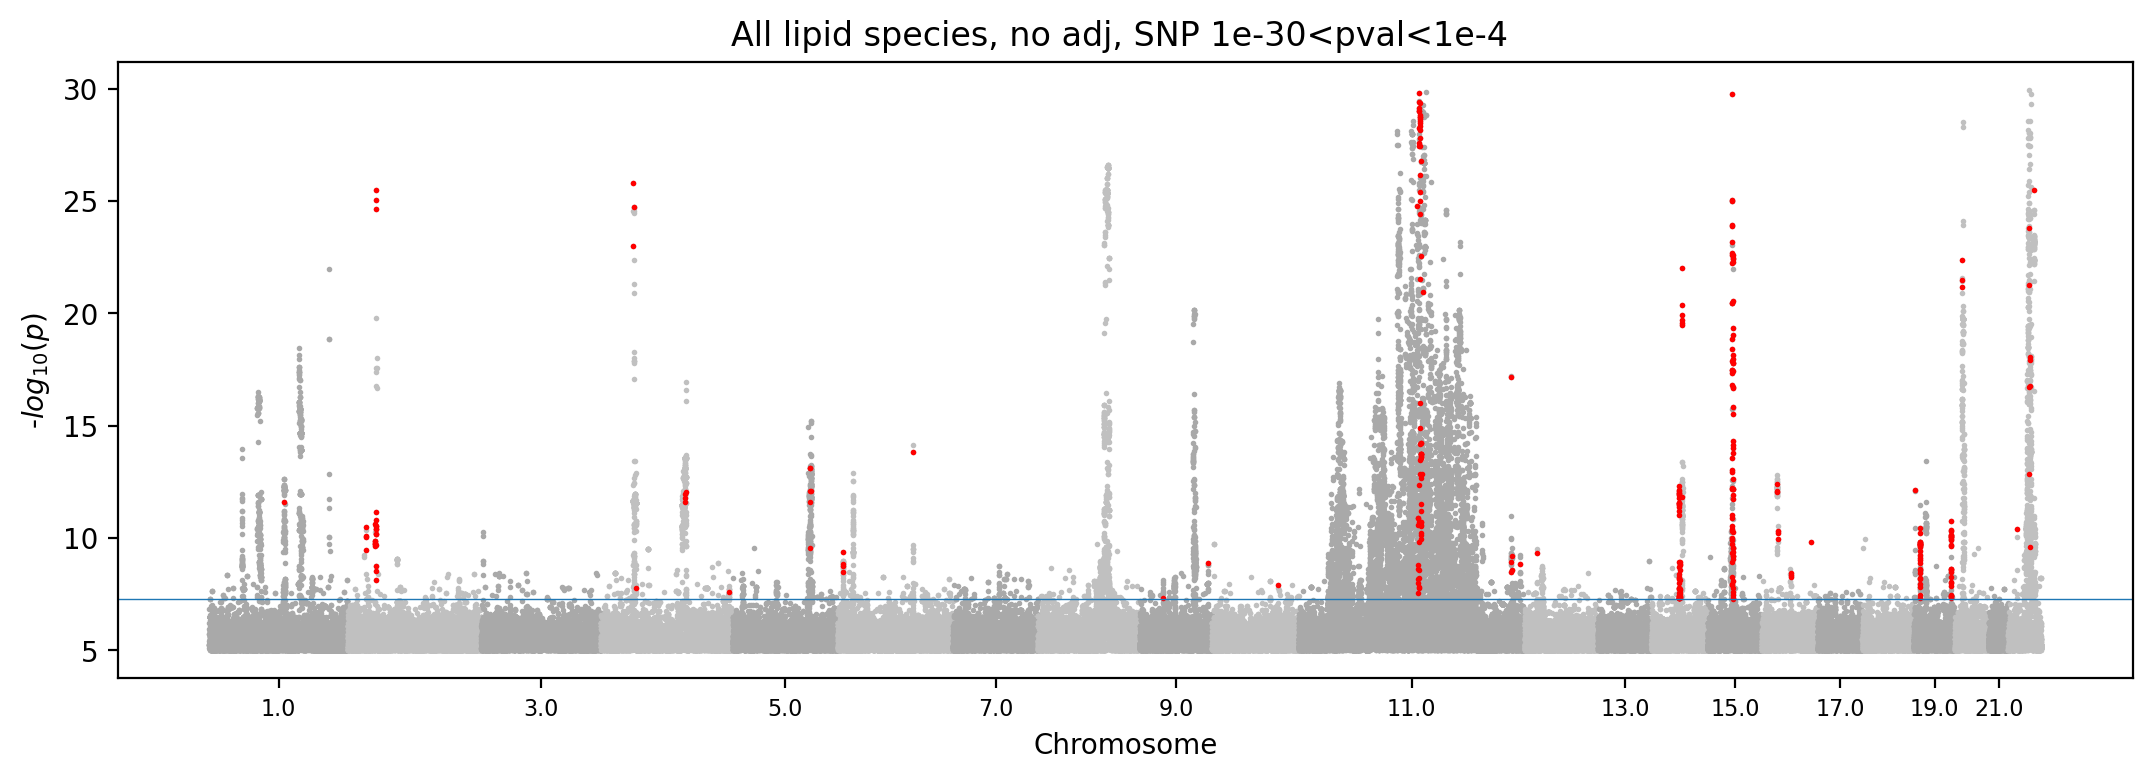

In [173]:
threshold = 1e-30
f, a, df_constraint = manhattan_plot_multiple_gwas(data=df_merged_all_snps[df_merged_all_snps['P']>=threshold].reset_index(),
                                                   pval='P', position='POS', chromosome='CHR',
                                                   sig_pval=5e-8, title=f'All lipid species, no adj, SNP {threshold}<pval<1e-4 ',
                                                   known=True, figsize=(13,4), colors=['darkgrey', 'silver'])


0 rows processed, index=1
.......................230208 rows processed, index =230209


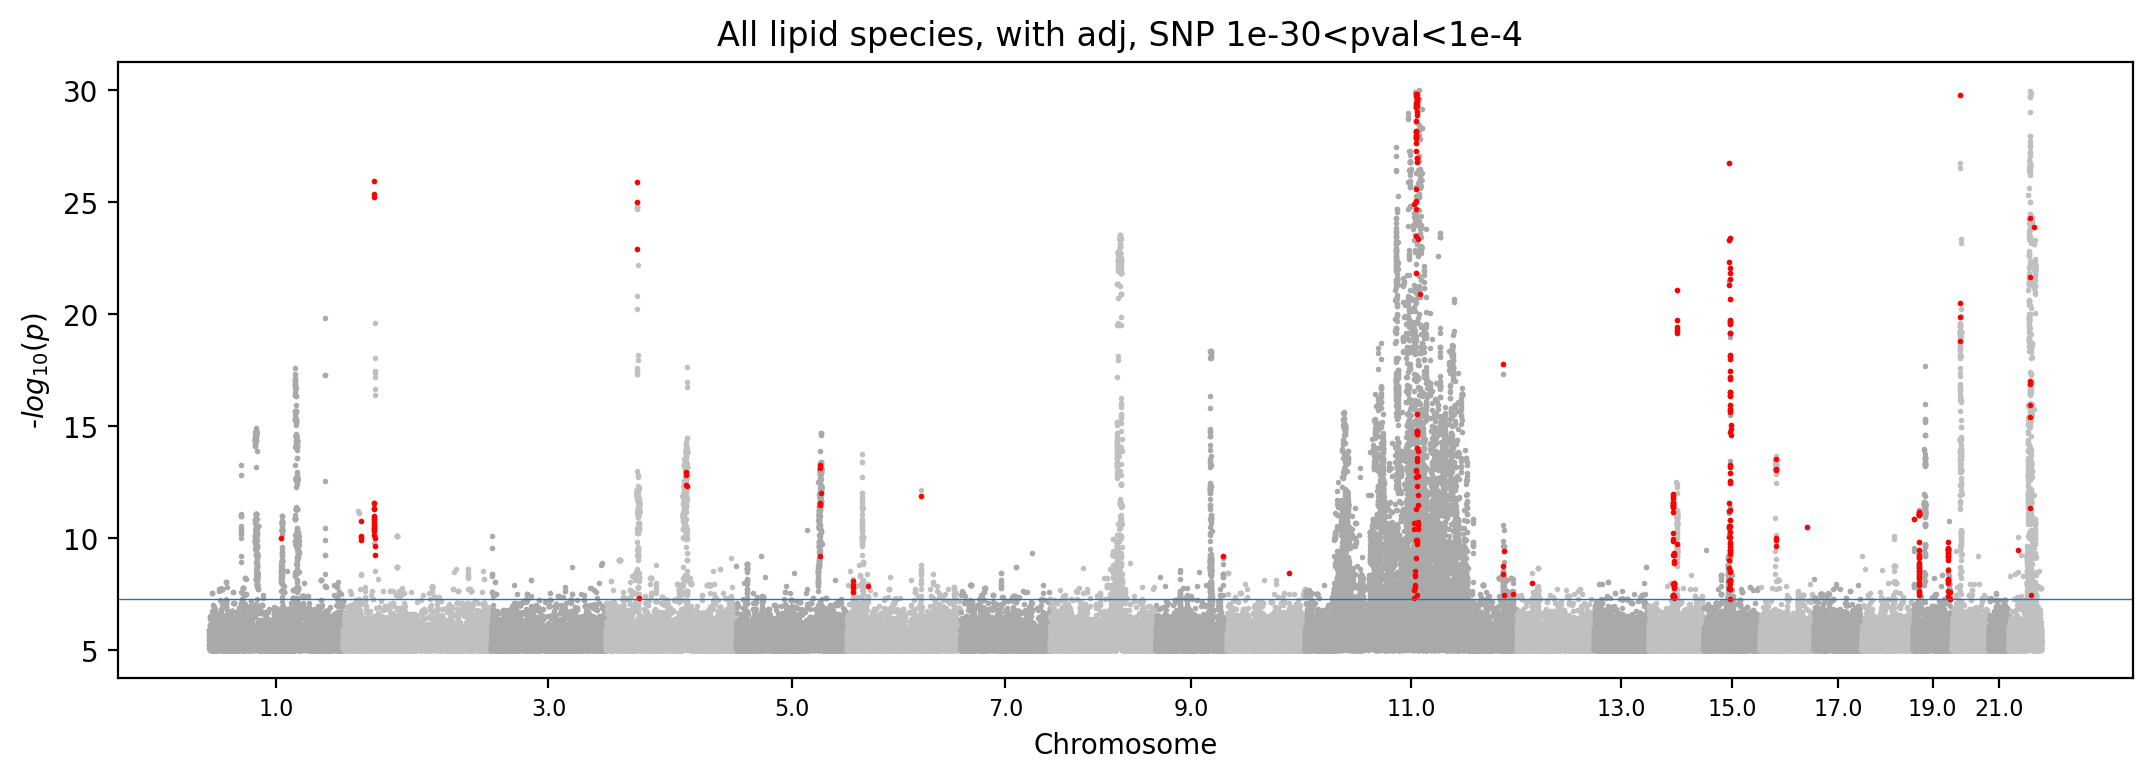

In [169]:
threshold = 1e-30
f, a, df_constraint = manhattan_plot_multiple_gwas(data=df_merged_all_snps[df_merged_all_snps['P']>=threshold].reset_index(),
                                                   pval='P', position='POS', chromosome='CHR',
                                                   sig_pval=5e-8, title=f'All lipid species, with adj, SNP {threshold}<pval<1e-4 ',
                                                   known=True, figsize=(13,4), colors=['darkgrey', 'silver'])
